## Interesting Patterns of Funding and Startups.

1. How Does the Funding Ecosystem changes with respect to Time?
2. What is the General Amount that Startups get in India?
3. Which Kind of Industries are more preferred for Startups?
4. Does Location also play a role, In determining the Growth of a Startup?
5. Who plays the main role in Indian Startups Ecosystem?
6. What are the different Types of Funding for Startups?

In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (16, 7)

import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

## Reading the data

In [71]:
data = pd.read_csv("startup_funding.csv")
data.columns = ["SNo", "Date", "StartupName", "IndustryVertical", "SubVertical",
                        "City", "InvestorsName", "InvestmentType", "AmountInUSD", "Remarks"]

def clean_string(x):
    return str(x).replace("\\xc2\\xa0","").replace("\\\\xc2\\\\xa0", "")
 
for col in ["StartupName", "IndustryVertical", "SubVertical", "City", 
            "InvestorsName", "InvestmentType", "AmountInUSD", "Remarks"]:
    data[col] = data[col].apply(lambda x: clean_string(x))
    
data.head(10)

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",nan
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",nan
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",nan
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",nan
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",nan
5,6,13/01/2020,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,"90,00,000",nan
6,7,10/01/2020,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,"15,00,00,000",nan
7,8,12/12/2019,Ecozen,Technology,Agritech,Pune,Sathguru Catalyzer Advisors,Series A,"60,00,000",nan
8,9,06/12/2019,CarDekho,E-Commerce,Automobile,Gurgaon,Ping An Global Voyager Fund,Series D,"7,00,00,000",nan
9,10,03/12/2019,Dhruva Space,Aerospace,Satellite Communication,Bengaluru,"Mumbai Angels, Ravikanth Reddy",Seed,"5,00,00,000",nan


In [72]:
data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestmentType', 'AmountInUSD', 'Remarks'],
      dtype='object')

In [73]:
print("Size of data", data.shape)

Size of data (3044, 10)


## Data Cleaning

In [74]:
import warnings
warnings.filterwarnings('ignore')

total = data.isnull().sum().sort_values(ascending = False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent %'])

missing_data

,Total,Percent %
SNo,0,0.0
Date,0,0.0
StartupName,0,0.0
IndustryVertical,0,0.0
SubVertical,0,0.0
City,0,0.0
InvestorsName,0,0.0
InvestmentType,0,0.0
AmountInUSD,0,0.0
Remarks,0,0.0


In [75]:
data['Remarks'].value_counts()

nan                                      2625
Series A                                  177
Series B                                   64
Pre-Series A                               37
Series C                                   28
                                         ... 
Yet to Launch                               1
Pre-Series A bridge round                   1
pre Series-A                                1
Strategic Investment (Majority Stake)       1
Govt backed VC Fund                         1
Name: Remarks, Length: 70, dtype: int64

In [76]:
data = data.drop(['Remarks'], axis = 1)

data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestmentType', 'AmountInUSD'],
      dtype='object')

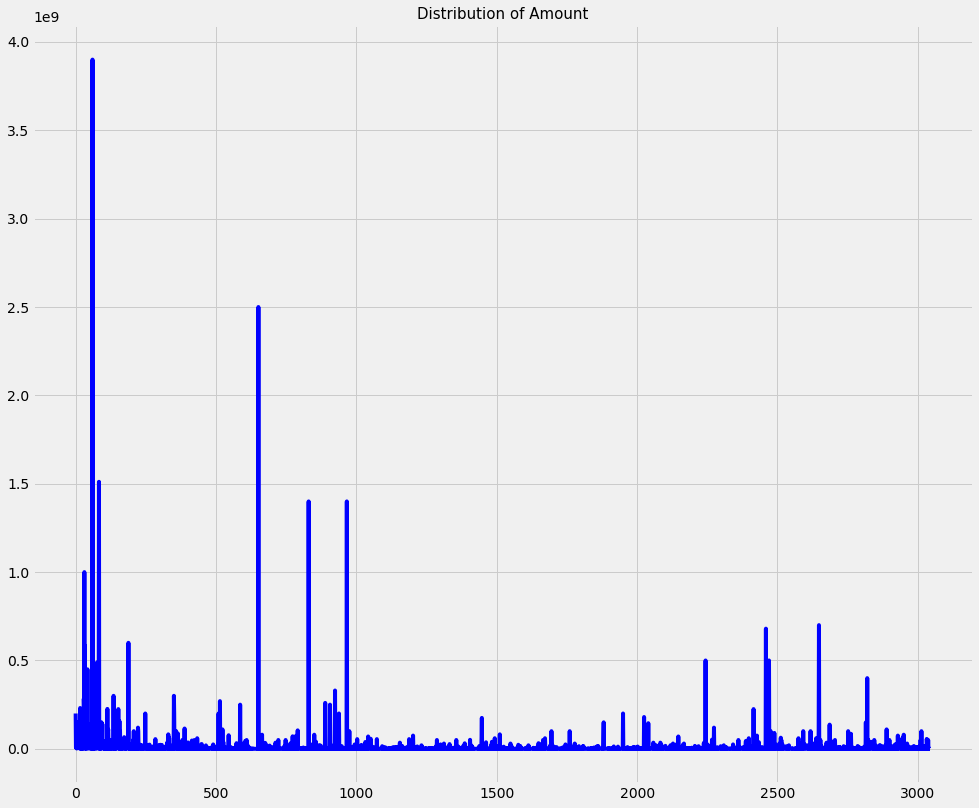

In [77]:
def clean_amount(x):
    x = ''.join([c for c in str(x) if c in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']])
    x = str(x).replace(",","").replace("+","")
    x = str(x).lower().replace("undisclosed","")
    x = str(x).lower().replace("n/a","")
    if x == '':
        x = '-999'
    return x

data["AmountInUSD"] = data["AmountInUSD"].apply(lambda x: float(clean_amount(x)))
plt.rcParams['figure.figsize'] = (15, 13)
data['AmountInUSD'].plot(kind = 'line', color = 'blue')
plt.title('Distribution of Amount', fontsize = 15)
plt.show()

In [78]:
data['Date'][data['Date']=='12/05.2015'] = '12/05/2015'
data['Date'][data['Date']=='13/04.2015'] = '13/04/2015'
data['Date'][data['Date']=='15/01.2015'] = '15/01/2015'
data['Date'][data['Date']=='22/01//2015'] = '22/01/2015'
data['Date'][data['Date']=='05/072018'] = '05/07/2018'
data['Date'][data['Date']=='01/07/015'] = '01/07/2015'
data['Date'][data['Date']=='\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'

## How Does the Funding Ecosystem changes with respect to Time?

Number of funding per month in decreasing order(Top 10)
 201601    104
201602    100
201508     98
201507     98
201606     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: yearmonth, dtype: int64


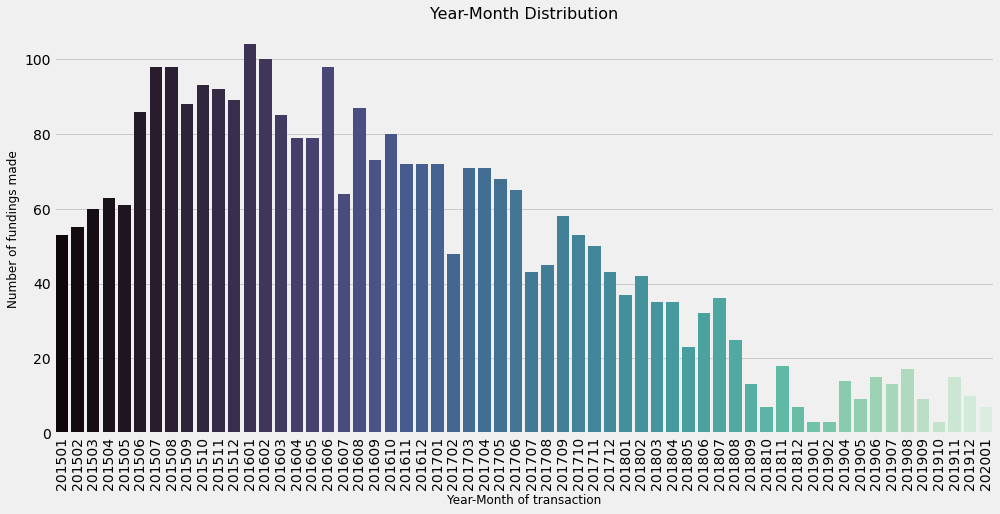

In [79]:
data["yearmonth"] = (pd.to_datetime(data['Date'],
         format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(data['Date'],format='%d/%m/%Y').dt.month)


temp = data['yearmonth'].value_counts().sort_values(ascending = False).head(10)
print("Number of funding per month in decreasing order(Top 10)\n",temp)
year_month = data['yearmonth'].value_counts()

plt.rcParams['figure.figsize'] = (15, 7)
sns.barplot(year_month.index, year_month.values, palette = 'mako')
plt.xticks(rotation = 90)
plt.xlabel('Year-Month of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)
plt.show()

## What is the General Amount that Startups get in India?

In [80]:
print("Maximum funding to a Startups is : ", data["AmountInUSD"].dropna().sort_values().max())

Maximum funding to a Startups is :  3900000000.0


In [81]:
@interact
def check(column = 'AmountInUSD', x = 500000000): 
    return data[data[column] > x].sort_values(by = 'AmountInUSD', ascending = False)

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth
60,61,27/08/2019,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series B,3.900000e+09,201908
651,652,11/08/2017,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,2.500000e+09,201708
83,84,06/06/2019,Pratilipi,Digital Media,E-Books,Bengaluru,Qiming Venture Partners,Series B,1.510950e+09,201906
830,831,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,201705
966,967,21/03/2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,201703
31,32,25/11/2019,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09,201911
2648,2649,28/07/2015,Flipkart.com,Online Marketplace,nan,Bangalore,Steadview Capital and existing investors,Private Equity,7.000000e+08,201507
2459,2460,29/09/2015,Paytm,E-Commerce & M-Commerce platform,nan,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08,201509
188,189,30/08/2018,True North,Finance,Private Equity Firm,Mumbai,nan,Private Equity,6.000000e+08,201808
33,34,02/10/2019,Udaan,B2B,Business development,Bengaluru,"Altimeter Capital, DST Global",Series D,5.850000e+08,201910


In [82]:
data[data.StartupName == 'Pando']

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth
5,6,13/01/2020,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,9000000.0,202001


In [83]:
data[data.StartupName == 'Paytm']

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth
31,32,25/11/2019,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09,201911
251,252,26/06/2018,Paytm,Technology,Digital Payment Platform,Noida,One 97 Communications,Private Equity,8.950000e+06,201806
830,831,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,201705
1493,1494,30/08/2016,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07,201608
2459,2460,29/09/2015,Paytm,E-Commerce & M-Commerce platform,nan,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08,201509
2890,2891,13/03/2015,Paytm,nan,nan,nan,Ratan Tata,Private Equity,-9.990000e+02,201503
2948,2949,05/02/2015,Paytm,nan,nan,nan,Ant Financial Services (Alipay),Private Equity,-9.990000e+02,201502


In [84]:
# lets check the minimum funding in a startup
print("Minimum funding to a Startups is : ", data["AmountInUSD"].dropna().sort_values().min())

Minimum funding to a Startups is :  -999.0


In [85]:
# lets check the startups with least funding
data[['AmountInUSD','StartupName']].sort_values(by = 'AmountInUSD', ascending = True).head(5)

,AmountInUSD,StartupName
2125,-999.0,Splitkart
1464,-999.0,TAC Security
708,-999.0,FableStreet
709,-999.0,Monsoon Fintech
710,-999.0,MonkeyBox


In [86]:
data[data['AmountInUSD'] == -999.0].shape

(971, 10)

In [87]:
print("On Average indian startups got funding of : ", data["AmountInUSD"].dropna().sort_values().mean())

On Average indian startups got funding of :  13270058.261169514


Total startups funded :  2457
Swiggy       8
Ola Cabs     8
Paytm        7
Meesho       6
Nykaa        6
UrbanClap    6
NoBroker     6
Medinfi      6
Flipkart     5
Jugnoo       5
Name: StartupName, dtype: int64


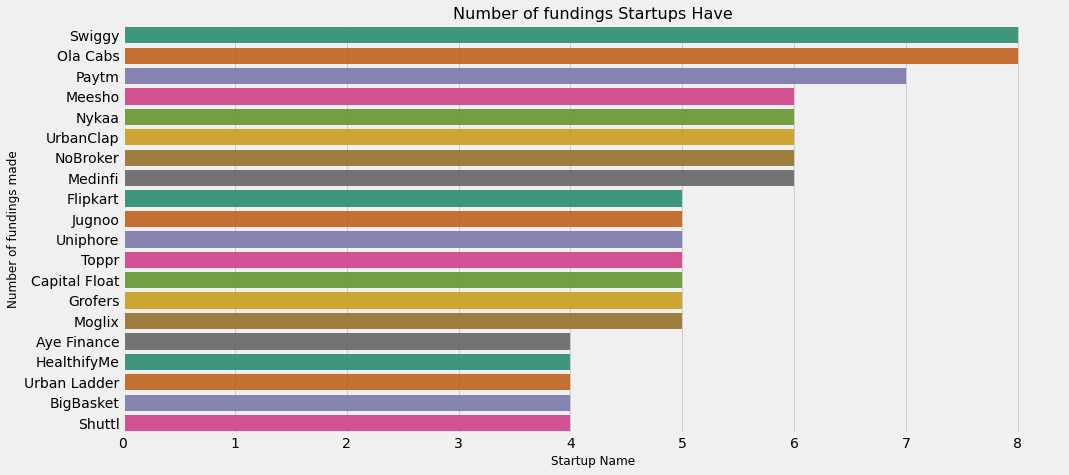

In [91]:
print("Total startups funded : ", len(data["StartupName"].unique()))
print(data["StartupName"].value_counts().head(10))
startupname = data['StartupName'].value_counts().head(20)

sns.barplot(y = startupname.index, x = startupname.values, alpha=0.9, palette = 'Dark2')
plt.xlabel('Startup Name', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Number of fundings Startups Have", fontsize=16)
plt.show()

## Which Kind of Industries are more preferred for Startups?

Consumer Internet      941
Technology             478
eCommerce              186
Consumer Technology    172
Healthcare              70
Finance                 62
ECommerce               61
Logistics               32
E-Commerce              29
Education               24
Name: IndustryVertical, dtype: int64


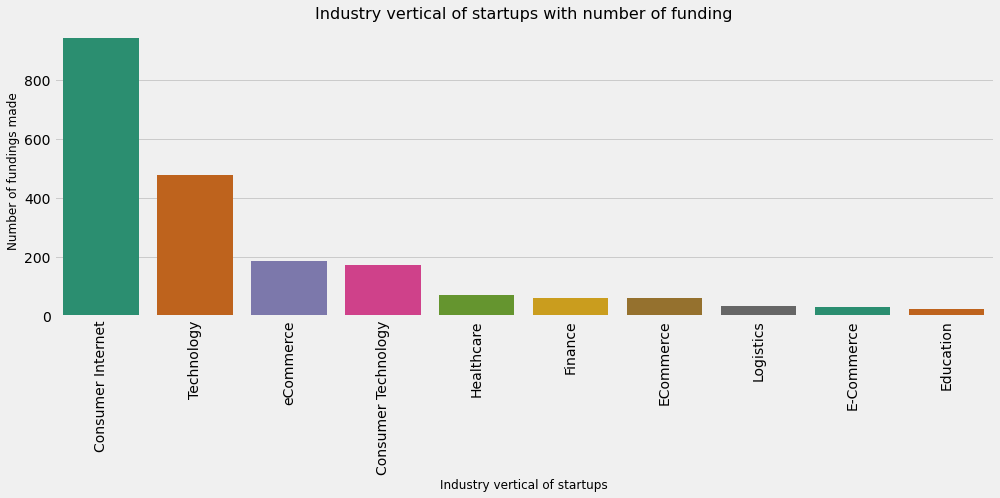

In [95]:
data['IndustryVertical'] = data['IndustryVertical'].replace('nan', 'Consumer Technology')

industry = data['IndustryVertical'].value_counts().head(10)
print(industry)


sns.barplot(industry.index, industry.values, palette = 'Dark2')
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()

Online Lending Platform          11
Online Pharmacy                  10
Food Delivery Platform            8
Online lending platform           5
Online Learning Platform          5
Online Lending                    5
Education                         5
Online Education Platform         5
Non-Banking Financial Company     4
Online Food Delivery              4
SaaS                              3
Online Food Delivery Platform     3
Agri-tech                         3
Online Insurance Aggregator       3
Online Insurance Platform         3
Data Analytics platform           3
Fitness Mobile App                3
Online Furniture Store            3
Online Payment Gateway            3
B2B Marketplace                   3
Name: SubVertical, dtype: int64


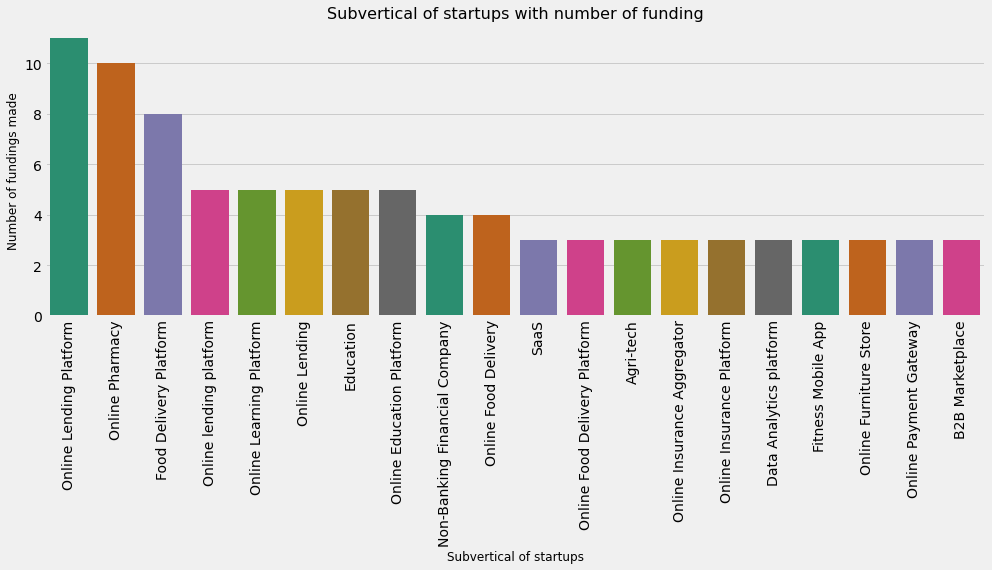

In [99]:
industry = data['SubVertical'].value_counts()[1:].head(20)
print(industry)

sns.barplot(industry.index, industry.values, palette = 'Dark2')
plt.xticks(rotation='vertical')
plt.xlabel('Subvertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Subvertical of startups with number of funding", fontsize=16)
plt.show()

## Does Location also play a role, In determining the Growth of a Startup?

Bangalore    1022
Mumbai        568
New Delhi     424
Gurgaon       291
Pune          105
Hyderabad      99
Chennai        97
Noida          93
Name: City, dtype: int64


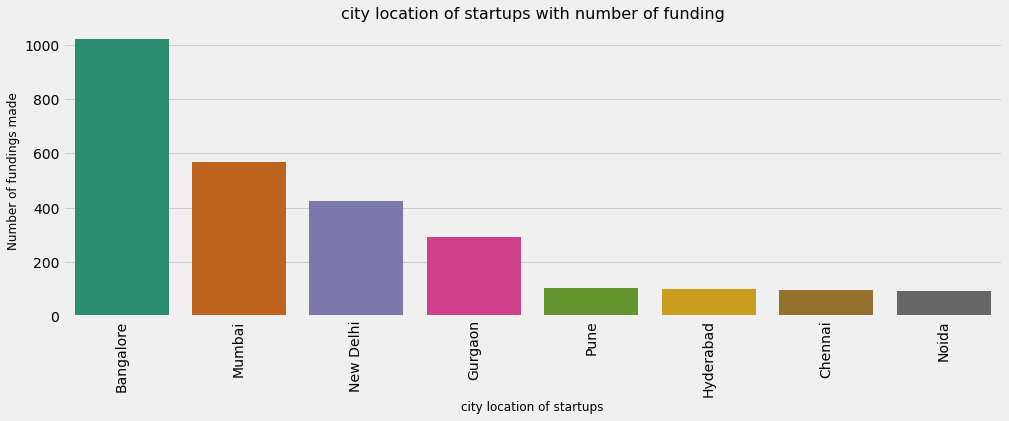

In [111]:
data['City'] = data['City'].replace(('Bengaluru', 'nan'),('Bangalore', 'Bangalore'))

city = data['City'].value_counts().head(8)
print(city)

sns.barplot(city.index, city.values, palette = 'Dark2')
plt.xticks(rotation='vertical')
plt.xlabel('city location of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("city location of startups with number of funding", fontsize=16)
plt.show()

## Who plays the main role in Indian Startups Ecosystem?

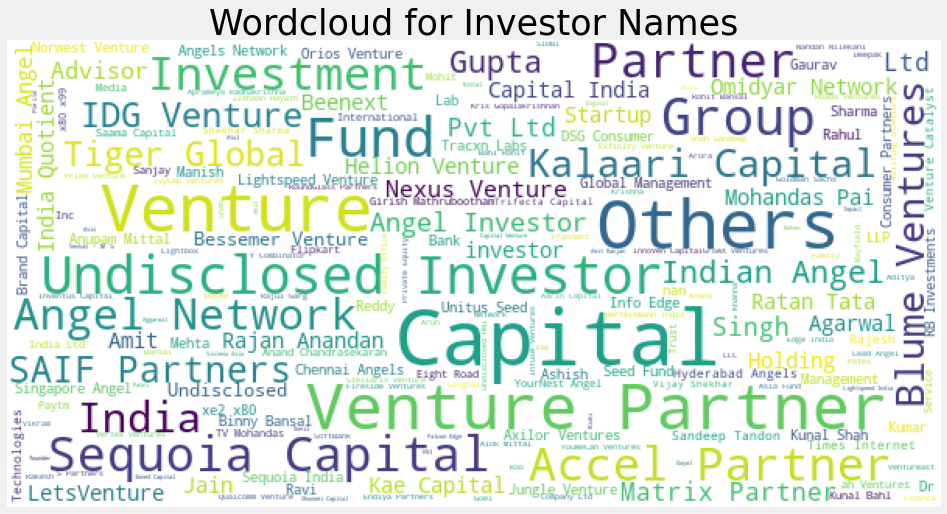

In [113]:
from wordcloud import WordCloud

names = data["InvestorsName"][~pd.isnull(data["InvestorsName"])]
wordcloud = WordCloud(max_font_size=50, width=600, height=300, background_color = 'white').generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Investor Names", fontsize=35)
plt.axis("off")
plt.show()

Undisclosed Investors       136
Ratan Tata                   25
Indian Angel Network         24
Kalaari Capital              16
Group of Angel Investors     15
Sequoia Capital              15
Accel Partners               12
Brand Capital                11
Venture Catalysts            11
RoundGlass Partners          10
Name: InvestorsName, dtype: int64


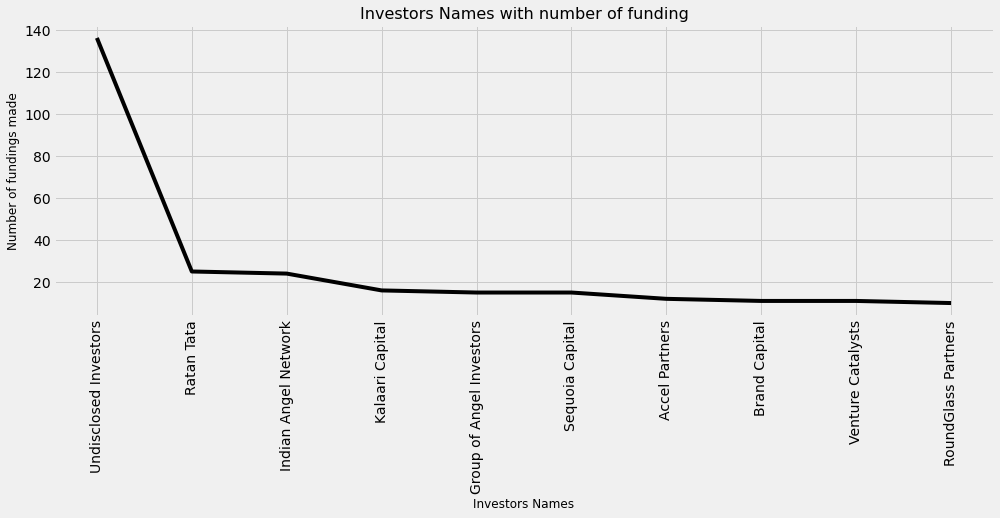

In [118]:
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'undisclosed Investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'undisclosed investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed investor'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'nan'] = 'Undisclosed Investors'

investors = data['InvestorsName'].value_counts().head(10)
print(investors)

sns.lineplot(investors.index, investors.values,  color='black')
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16)
plt.show()

## What are the different Types of Funding for Startups?

Private Equity          1357
Seed Funding            1355
Seed/ Angel Funding       60
Seed / Angel Funding      47
Seed\\nFunding            30
Debt Funding              25
Series A                  24
Seed/Angel Funding        23
Series B                  20
Series C                  14
Name: InvestmentType, dtype: int64


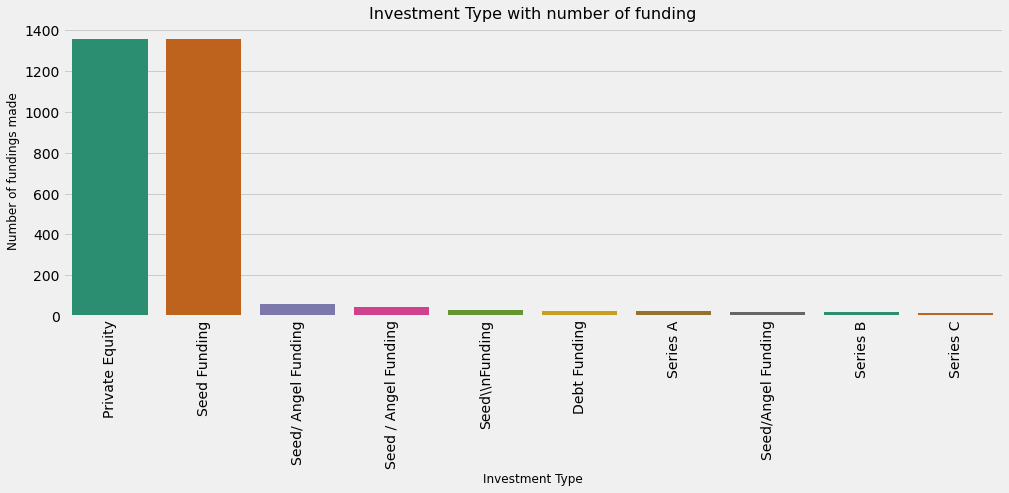

In [121]:
investment = data['InvestmentType'].value_counts().head(10)
print(investment)

data['InvestmentType'][data['InvestmentType'] == 'SeedFunding'] = 'Seed Funding'
data['InvestmentType'][data['InvestmentType'] == 'Crowd funding'] = 'Crowd Funding'
data['InvestmentType'][data['InvestmentType'] == 'PrivateEquity'] = 'Private Equity'

sns.barplot(investment.index, investment.values, palette = 'Dark2')
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investment Type with number of funding", fontsize=16)
plt.show()